In [14]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
import scipy.linalg as la

In [15]:
dir = "../data"
data_files = os.listdir(dir)

thread_files = [s for s in data_files if "thread_scaling_" in s and "h5" in s and "case_two" not in s]
h5_filenames = [dir + '/' + f for f in thread_files]
print(h5_filenames)
h5_files = [h5py.File(fn) for fn in h5_filenames]

simd_thread_files = [s for s in data_files if "thread_scaling2" in s and "h5" in s]
simd_h5_filenames = [dir + '/' + f for f in simd_thread_files]
print(simd_h5_filenames)
simd_h5_files = [h5py.File(fn) for fn in simd_h5_filenames ]

case_two_thread_files = [s for s in data_files if "thread_scaling_" in s and "h5" in s and "case_two" in s and "simd" not in s]
case_two_h5_filenames = [dir + '/' + f for f in case_two_thread_files]
print(case_two_h5_filenames)
case_two_h5_files = [h5py.File(fn) for fn in case_two_h5_filenames]

case_two_simd_files = [s for s in data_files if "thread_scaling_" in s and "h5" in s and "simd" in s]
case_two_simd_h5_filenames = [dir + '/' + f for f in case_two_simd_files]
print(case_two_simd_h5_filenames)
case_two_simd_h5_files = [h5py.File(fn) for fn in case_two_simd_h5_filenames]

['../data/thread_scaling_8.h5', '../data/thread_scaling_2.h5', '../data/thread_scaling_16.h5', '../data/thread_scaling_4.h5', '../data/thread_scaling_1.h5']
['../data/thread_scaling2_2.h5', '../data/thread_scaling2_16.h5', '../data/thread_scaling2_8.h5', '../data/thread_scaling2_1.h5', '../data/thread_scaling2_4.h5']
['../data/thread_scaling_case_two_1.h5', '../data/thread_scaling_case_two_4.h5', '../data/thread_scaling_case_two_2.h5', '../data/thread_scaling_case_two_8.h5', '../data/thread_scaling_case_two_16.h5']
['../data/thread_scaling_case_two_simd_4.h5', '../data/thread_scaling_case_two_simd_16.h5', '../data/thread_scaling_case_two_simd_1.h5', '../data/thread_scaling_case_two_simd_8.h5', '../data/thread_scaling_case_two_simd_2.h5']


In [16]:
def compare_strategies(thread_files, simd_files):
    assert len(thread_files) == len(simd_files)
    distances = np.zeros((len(thread_files), len(thread_files)))
    for i1, f1 in enumerate(thread_files):
        for i2, f2 in enumerate(thread_files):
            soln1 = f1["population"][()]
            soln2 = f2["population"][()]
            distances[i1, i2] = la.norm(soln1 - soln2) / soln1.size
    return distances

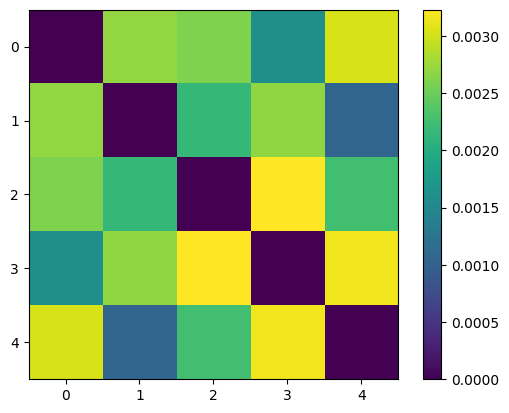

In [17]:
distances = compare_strategies(h5_files, simd_h5_files)
mappable = plt.imshow(distances)
plt.colorbar(mappable)
plt.savefig("../plots/verification_thread_simd_case1.png")

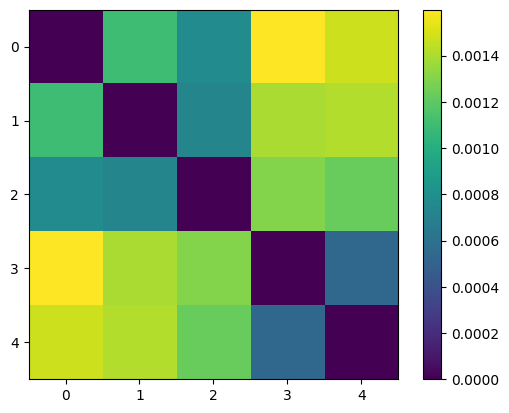

In [18]:
distances = compare_strategies(case_two_h5_files, case_two_simd_h5_files)
mappable = plt.imshow(distances)
plt.colorbar(mappable)
plt.savefig("../plots/verification_thread_simd_case2.png")